# Project

This notebook will go though the various aspects of iteration through the various python scripts used as part of this project. 

https://www.met.ie/climate/available-data/historical-data

In [25]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import python_scripts.project_functions as pf

In [26]:
# zipped_data = 'data\\hly2375.zip'
# dst_dir = 'data\\'

# # Unzip the combined zip file
# with zipfile.ZipFile(zipped_data, 'r') as zip_ref:
#     zip_ref.extractall(dst_dir)

In [27]:
pf.extract_zip('data\\hly2375.zip', 'data\\')

import data

In [28]:
path = 'data\\hly2375.csv'
data = pd.read_csv(path, skiprows=22, low_memory=False)
# setting low_memory to false to stop guessing of column dtypes as this is memory intensive


print(data.shape)
print(data.head())

(597898, 21)
                date  ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  16-sep-1956 15:00    0   0.0      0  14.4      0  12.1   10.0   12.4    76   
1  16-sep-1956 16:00    0   0.0      0  13.9      0  11.6    9.4   11.9    75   
2  16-sep-1956 17:00    0   0.0      0  14.2      0  12.0   10.0   12.3    76   
3  16-sep-1956 18:00    0   0.0      0  13.0      0  11.6   10.0   12.6    85   
4  16-sep-1956 19:00    0   0.0      0  12.6      0  11.7   11.1   13.1    90   

   ...  ind.3  wdsp ind.4  wddir ww  w  sun    vis clht clamt  
0  ...      1     0     1      0  1  2  0.1  16000  200     5  
1  ...      1     0     1      0  1  1  0.1  24000  999     4  
2  ...      1     0     1      0  3  1  0.4  19000   90     5  
3  ...      1     0     1      0  1  1  0.0  30000   45     4  
4  ...      1     0     1      0  3  2  0.0  28000   40     7  

[5 rows x 21 columns]


In [29]:
print(np.min(data.date),np.max(data.date))
# the first year is 1956, and the last date is in December 2024 so need to add the date column as the index. 

01-apr-1957 00:00 31-oct-2024 23:00


In [30]:
# firstly capitalise the first letter of month

# Apply the function to the date column
data['date'] = data['date'].apply(pf.capitalize_month)


    
print(data.head())

                date  ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  16-Sep-1956 15:00    0   0.0      0  14.4      0  12.1   10.0   12.4    76   
1  16-Sep-1956 16:00    0   0.0      0  13.9      0  11.6    9.4   11.9    75   
2  16-Sep-1956 17:00    0   0.0      0  14.2      0  12.0   10.0   12.3    76   
3  16-Sep-1956 18:00    0   0.0      0  13.0      0  11.6   10.0   12.6    85   
4  16-Sep-1956 19:00    0   0.0      0  12.6      0  11.7   11.1   13.1    90   

   ...  ind.3  wdsp ind.4  wddir ww  w  sun    vis clht clamt  
0  ...      1     0     1      0  1  2  0.1  16000  200     5  
1  ...      1     0     1      0  1  1  0.1  24000  999     4  
2  ...      1     0     1      0  3  1  0.4  19000   90     5  
3  ...      1     0     1      0  1  1  0.0  30000   45     4  
4  ...      1     0     1      0  3  2  0.0  28000   40     7  

[5 rows x 21 columns]


Setting the `date` column to be index. In a similar fashion to [here](https://github.com/EllenMcG/PFDA/blob/main/assignments/assignment_6_weather.ipynb).

In [31]:
# setting date to index and sorting by index to ensure data is sorted properly 
data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index)

# sort values
sorted_index = data.index.sort_values()
data = data.loc[sorted_index]

## Section 1 - Comparison with a subset of data (used for testing)

While a `pd.resample` could be used, this only has quarters and not true seasons. Using similar data from Met Éireann, [Murphy et al., 2023](https://www.sciencedirect.com/science/article/pii/S2212094723000610) break down the seasons into from the months below;
- Winter: Dec, Jan, and Feb
- Spring: Mar, Apr, and May
- Summer: Jun, Jul, and Aug
- Autumn: Sep, Oct, and Nov



In [32]:
data_condensed = data.sample(n=1000, random_state=42)
print(data_condensed.head())

                     ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                           
1963-04-13 11:00:00    0   0.2      0   7.8      0   5.8    3.0    7.6    72   
1979-08-19 04:00:00    2   0.0      0  12.6      0  11.6   11.0   12.8    88   
1970-06-12 23:00:00    2   0.0      0  14.4      0  14.1   14.0   15.8    97   
2001-02-16 15:00:00    0   0.0      0   8.0      0   6.6    4.8    8.6    80   
1962-01-22 08:00:00    0   0.0      0   5.6      0   3.5    0.0    6.2    68   

                        msl  ind.3 wdsp  ind.4 wddir  ww   w  sun    vis clht  \
date                                                                            
1963-04-13 11:00:00  1009.1      1   19      1   250  25   8  0.8  19000   19   
1979-08-19 04:00:00  1019.7      0   14      0   310  50   5  0.0   3000    2   
1970-06-12 23:00:00  1018.6      0   11      0    30  50   5  0.0   3200    4   
2001-02-16 15:00:00  1037.2      2

In [33]:
data_condensed = pf.add_month_and_season(data_condensed)

In [34]:
# data_condensed = pf.add_year_and_decade(data_condensed)

In [35]:
# print(data_condensed.head())

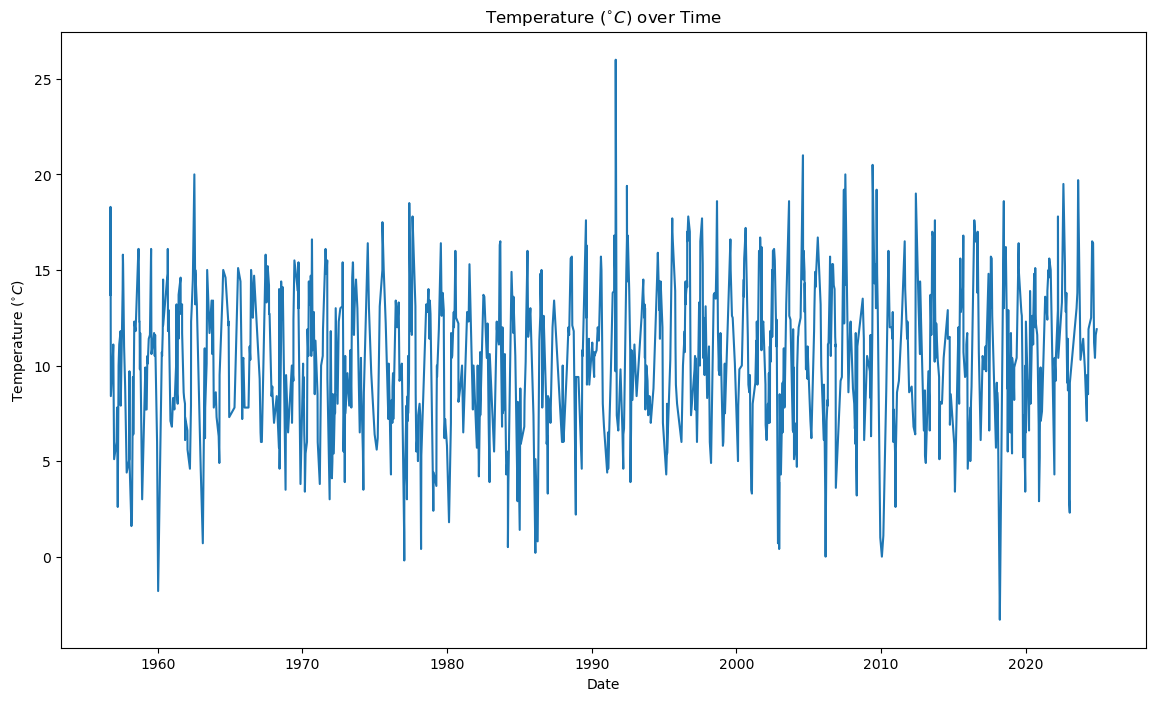

In [36]:
# Plotting the temperature over time
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=data_condensed,x=data_condensed.index,y='temp')
ax.set_ylabel('Temperature ($^{\circ}C$)')
ax.set_xlabel('Date')
ax.set_title('Temperature ($^{\circ}C$) over Time');

In [37]:
# testing will full dataset
data = pf.add_month_and_season(data)

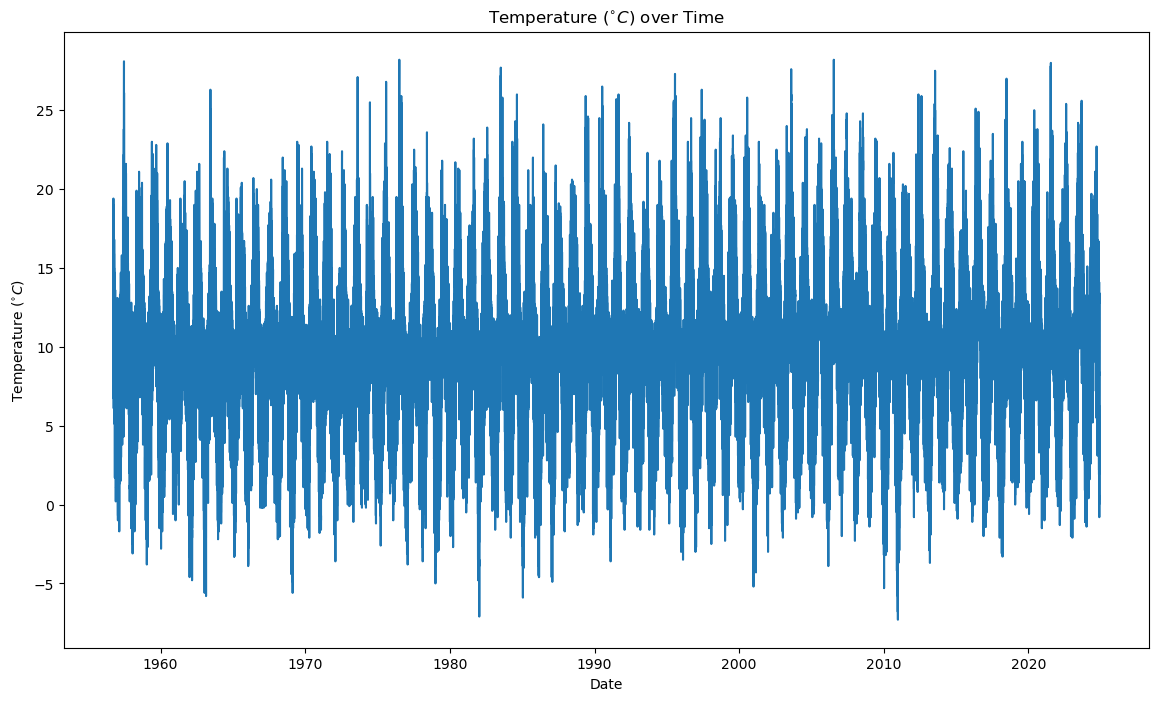

In [38]:
# Plotting the temperature over time
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=data,x=data.index,y='temp')
ax.set_ylabel('Temperature ($^{\circ}C$)')
ax.set_xlabel('Date')
ax.set_title('Temperature ($^{\circ}C$) over Time');

## Section 2 - Seasonality 

Adding decades for plotting 

In [39]:
# Plotting the temperature by season over time (decades)
data = pf.add_year_and_decade(data)

## Section 3 - Power Analysis 

In [40]:
a = data['wdsp'].unique()
print(a)

# a = data['wdsp'].isnull().sum()
# print(a)

# b = data['wdsp'].value_counts()
# print(b)

['0' '9' '7' '4' '6' '8' '11' '12' '10' '5' '13' '14' '15' '18' '19' '17'
 '16' '21' '24' '22' '26' '20' '23' '3' '2' '1' '25' '36' '38' '34' '37'
 '29' '27' '28' '31' '30' '32' '33' '35' '41' '45' '49' '48' '43' '39'
 '40' '44' '58' '63' '47' '59' '56' '42' '46' '51' '50' '53' '55' '52'
 '54' '57' ' ']


In [41]:
c = data['wdsp'].str.startswith(' ').sum()
print(c)

1


In [42]:
data['wdsp'] = np.where(data['wdsp'].str.startswith(' '), np.nan, data['wdsp'])
d = data['wdsp'].isnull().sum()
print(d)

1


In [43]:
data['wdsp'] = data['wdsp'].bfill()

In [44]:
# a = data['wdsp'].unique()
# print(a)

In [45]:
data['power'] = pf.calculate_power(data['wdsp'].astype(int))
print(data.head())

                     ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                           
1956-09-16 15:00:00    0   0.0      0  14.4      0  12.1   10.0   12.4    76   
1956-09-16 16:00:00    0   0.0      0  13.9      0  11.6    9.4   11.9    75   
1956-09-16 17:00:00    0   0.0      0  14.2      0  12.0   10.0   12.3    76   
1956-09-16 18:00:00    0   0.0      0  13.0      0  11.6   10.0   12.6    85   
1956-09-16 19:00:00    0   0.0      0  12.6      0  11.7   11.1   13.1    90   

                        msl  ...  w  sun    vis clht clamt month  season  \
date                         ...                                           
1956-09-16 15:00:00  1026.7  ...  2  0.1  16000  200     5   Sep  Autumn   
1956-09-16 16:00:00  1026.6  ...  1  0.1  24000  999     4   Sep  Autumn   
1956-09-16 17:00:00  1026.4  ...  1  0.4  19000   90     5   Sep  Autumn   
1956-09-16 18:00:00  1026.5  ...  1  0.0  30000   45     4 

In [46]:
a = data.groupby('season')['power'].agg(['mean','median','std'])
print(a)

              mean     median         std
season                                   
Autumn  143.259231  57.640022  229.876901
Spring  125.841409  57.640022  196.443698
Summer   85.520088  44.397494  125.287603
Winter  198.113104  91.530221  316.164120


## Final exported dataset

In [47]:
# data.to_csv('data\\hly2375_cleaned.csv', index=True)

In [48]:
# data_condensed['year'] = data_condensed.index.year.astype('str')
# print(data_condensed.info())

### **References**
[Murphy et al., 2023](https://www.sciencedirect.com/science/article/pii/S2212094723000610)